# Prediciton Model Report

### Author: Ryan Morris

## Imported Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load Power Consumption Data Set

In [ ]:
#Load Power_Consumption.csv into df

df = pd.read_csv("Power_Consumption.csv")

## Exploratory Data Analysis

In [ ]:
# Data Dimension
df.shape

(1461, 7)

In [ ]:
# Data Types
df.dtypes

,0
Dates,object
Whole_House_Consumption,float64
Volts,float64
Amps,float64
Kitchen_Consumption,float64
Laundry_Consumption,float64
HVAC_WaterHeater_Consumption,float64


In [ ]:
# Summary Statistics
df.describe()

,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,1363.276891,240.895906,4.592644,118.389313,426.052047,842.058987
std,646.190719,2.120401,1.682401,98.892979,180.376172,337.799733
min,6.000000,231.000000,1.000000,0.000000,0.000000,0.000000
25%,935.000000,240.000000,4.000000,29.000000,301.000000,543.000000
50%,1345.000000,241.000000,5.000000,111.000000,406.000000,1016.000000
75%,1751.000000,242.000000,6.000000,170.000000,518.000000,1127.000000
max,3984.000000,247.000000,12.000000,594.000000,1440.000000,1377.000000


In [ ]:
#Start of Data
df.head(5)

,Dates,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption
0,1/1/2007,2721.0,240.0,8.0,0.0,271.0,338.0
1,1/2/2007,1560.0,240.0,5.0,116.0,297.0,754.0
2,1/3/2007,113.0,241.0,1.0,0.0,241.0,114.0
3,1/4/2007,2675.0,240.0,8.0,315.0,612.0,1113.0
4,1/5/2007,1477.0,235.0,5.0,258.0,499.0,518.0


In [ ]:
#End of Data
df.tail(5)

,Dates,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption
1456,12/27/2010,2562.0,243.0,6.0,316.0,243.0,1176.0
1457,12/28/2010,2163.0,244.0,6.0,219.0,374.0,1226.0
1458,12/29/2010,2188.0,243.0,6.0,56.0,267.0,1132.0
1459,12/30/2010,2567.0,241.0,7.0,311.0,430.0,1169.0
1460,12/31/2010,3320.0,241.0,6.0,0.0,305.0,1300.0


## Data Preprocessing and Wrangling

Check for Missing Values

In [ ]:
#Check for Missing Values
na_summary = df.isna().sum()
print(na_summary)

Dates                            0
Whole_House_Consumption         20
Volts                           20
Amps                            20
Kitchen_Consumption             20
Laundry_Consumption             20
HVAC_WaterHeater_Consumption    20
dtype: int64


If Missing Values: fill or remove them

In [ ]:
#Forward Filling Missing values
df = df.ffill()

# Recheck missing again
na_summary = df.isna().sum()
na_summary

,0
Dates,0
Whole_House_Consumption,0
Volts,0
Amps,0
Kitchen_Consumption,0
Laundry_Consumption,0
HVAC_WaterHeater_Consumption,0


Make Date as datetime

In [ ]:
#Maxe date as date time and set to index
df['Date'] = pd.to_datetime(df['Dates'] )
df.set_index('Date', inplace=True)
df.head(5)

,Dates,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption
Date,,,,,,,
2007-01-01,1/1/2007,2721.0,240.0,8.0,0.0,271.0,338.0
2007-01-02,1/2/2007,1560.0,240.0,5.0,116.0,297.0,754.0
2007-01-03,1/3/2007,113.0,241.0,1.0,0.0,241.0,114.0
2007-01-04,1/4/2007,2675.0,240.0,8.0,315.0,612.0,1113.0
2007-01-05,1/5/2007,1477.0,235.0,5.0,258.0,499.0,518.0


Plot Daily Whole House Consumptions and record your observations

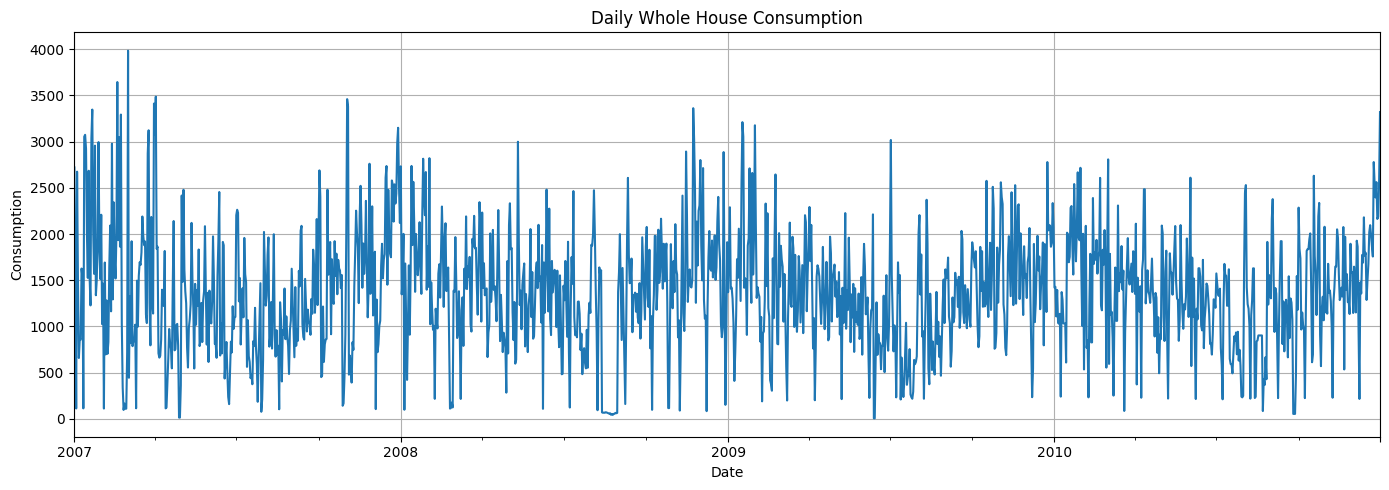

In [ ]:
# Plot Daily whole house consumption over time
plt.figure(figsize=(14, 5))
df["Whole_House_Consumption"].plot()
plt.title("Daily Whole House Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.grid(True)
plt.tight_layout()
plt.show()

Plot Whole House Consumption by Month/Year and record your observations

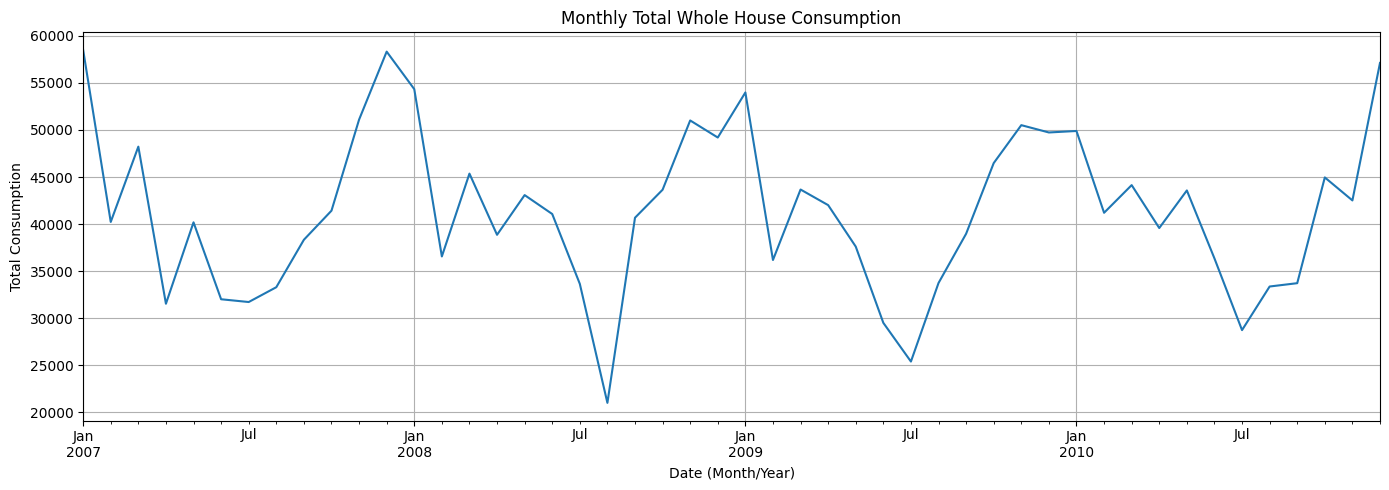

In [ ]:
#Get Monthly Sums
monthly_total = df["Whole_House_Consumption"].resample('M').sum()
#Plot total monthly whole house consumption
plt.figure(figsize=(14, 5))
monthly_total.plot()
plt.title("Monthly Total Whole House Consumption")
plt.xlabel("Date (Month/Year)")
plt.ylabel("Total Consumption")
plt.grid(True)
plt.tight_layout()
plt.show()

Plot Whole House Consumption by Year and record your observations

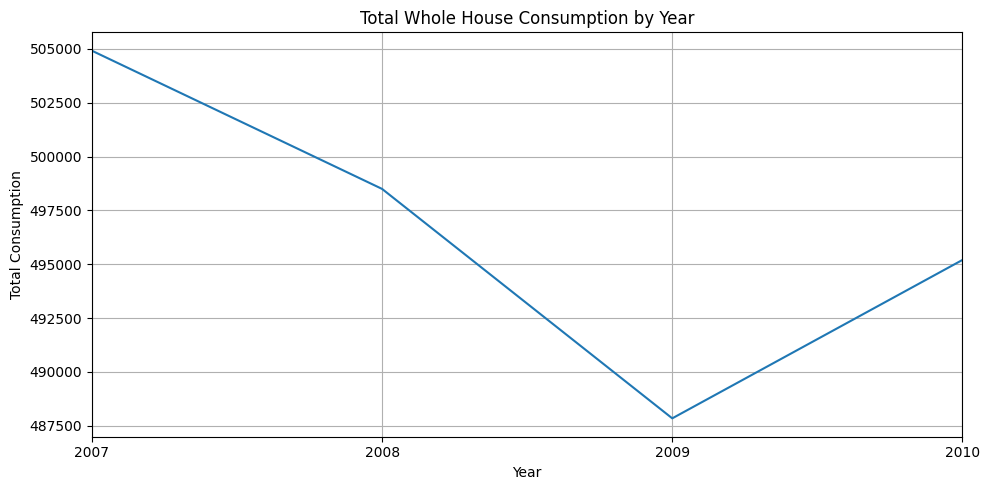

In [ ]:
# Get Yearly Sums
yearly_total = df["Whole_House_Consumption"].resample('Y').sum()
#Plot total yearly whole house consumption
plt.figure(figsize=(10, 5))
yearly_total.plot()
plt.title("Total Whole House Consumption by Year")
plt.xlabel("Year")
plt.ylabel("Total Consumption")
plt.grid(True)
plt.tight_layout()

Reshape data to analyze time series through plotting day, per weekday, month, and year

In [ ]:
#Create new time-based features from datetime index
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['month'] = df.index.month
df['year'] = df.index.year

df.head(5)

,Dates,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption,day,weekday,month,year
Date,,,,,,,,,,,
2007-01-01,1/1/2007,2721.0,240.0,8.0,0.0,271.0,338.0,1,Monday,1,2007
2007-01-02,1/2/2007,1560.0,240.0,5.0,116.0,297.0,754.0,2,Tuesday,1,2007
2007-01-03,1/3/2007,113.0,241.0,1.0,0.0,241.0,114.0,3,Wednesday,1,2007
2007-01-04,1/4/2007,2675.0,240.0,8.0,315.0,612.0,1113.0,4,Thursday,1,2007
2007-01-05,1/5/2007,1477.0,235.0,5.0,258.0,499.0,518.0,5,Friday,1,2007


Plot Average Whole House Consumption per weekday and write down your observations

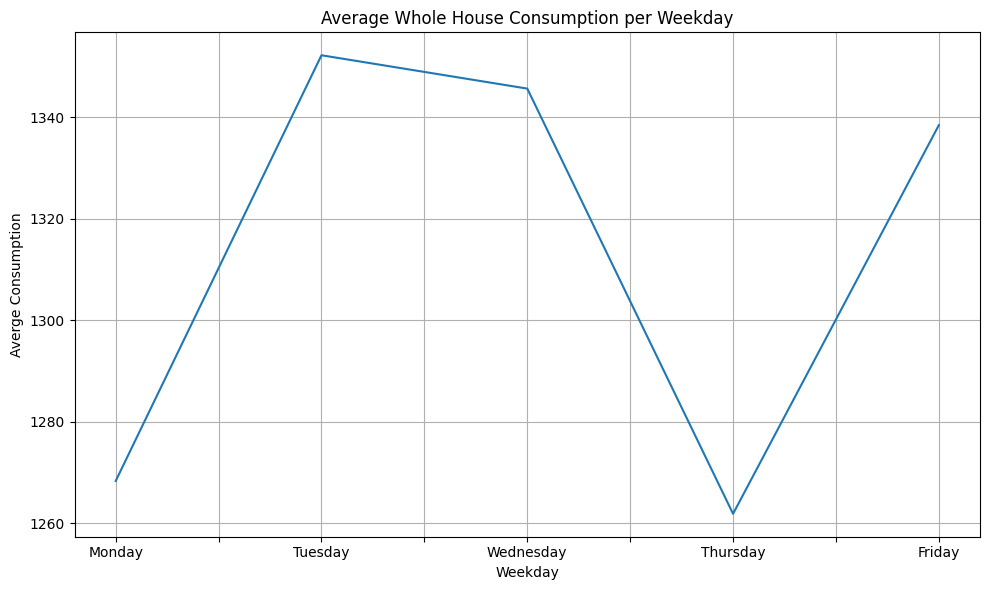

In [ ]:
# Group by weekday and calculate the average consumption
avg_weekday_consumption = df.groupby('weekday')['Whole_House_Consumption'].mean()

# Reorder weekdays for correct plotting order
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
avg_weekday_consumption = avg_weekday_consumption[ordered_weekdays]

# Plotting
plt.figure(figsize=(10, 6))
avg_weekday_consumption.plot()
plt.title('Average Whole House Consumption per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Averge Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

Plot Average Whole House Consumption per month and write down your observations

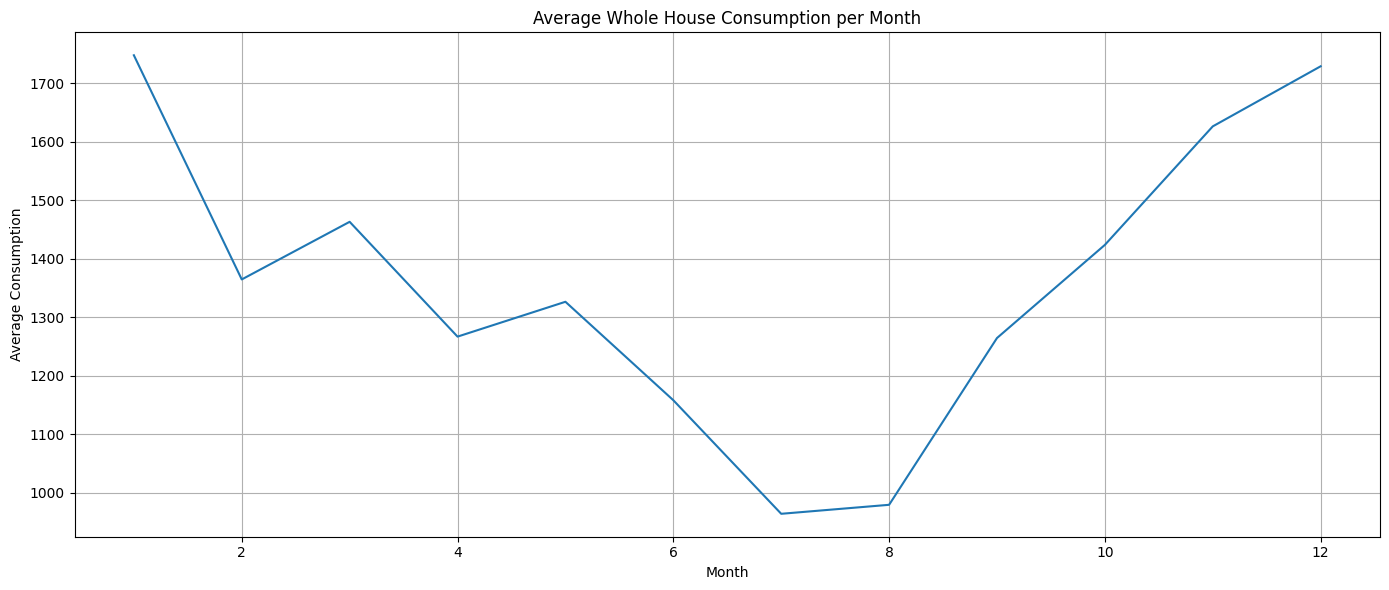

In [ ]:
# Group by month and calculate the average consumption
avg_monthly_consumption = df.groupby('month')['Whole_House_Consumption'].mean()

# Reorder months for correct plotting order
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder avg_monthly_consumption according to ordered_months
avg_monthly_consumption = avg_monthly_consumption[range(1, 13)] # Ensures all months 1-12 are included
avg_monthly_consumption = avg_monthly_consumption.iloc[range(12)] # Reorders based on the 12 months

# Plotting
plt.figure(figsize=(14, 6))
avg_monthly_consumption.plot()
plt.title('Average Whole House Consumption per Month')
plt.xlabel('Month')
plt.ylabel('Average Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

Plot Average Whole House Consumption per year and write down your observations

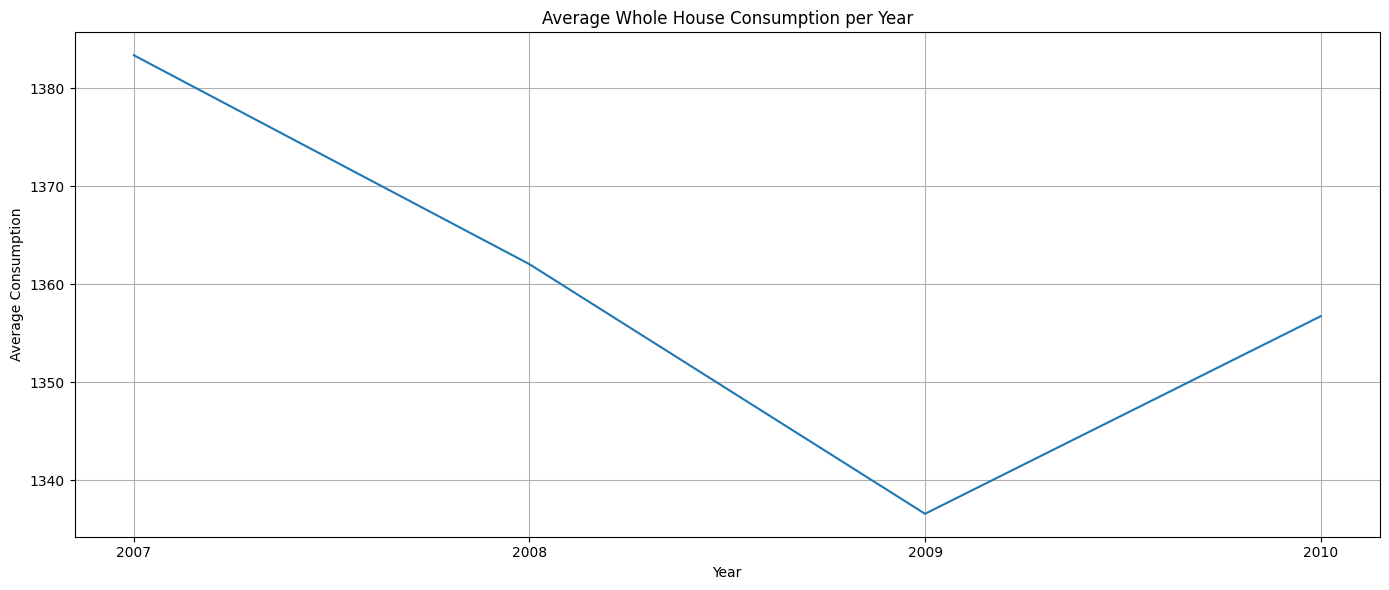

In [ ]:
#Group By year and Calculate Average Consumption
avg_yearly_consumption = df.groupby('year')['Whole_House_Consumption'].mean()

# Plotting
plt.figure(figsize=(14, 6))
avg_yearly_consumption.plot()
plt.xticks(avg_yearly_consumption.index)
plt.title('Average Whole House Consumption per Year')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

## Scale and Split Data into training and test

Standardize Whole House Consumption using MinMaxScaler

In [ ]:
# Initialize the scaler with your desired range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Whole_House_Consumption']].values)

# Step 2: Replace the original column with scaled values
df['Whole_House_Consumption'] = scaled_data

Create a subset consisting of Dates and the Scaled Consumption

In [ ]:
#Create Subset of data including just whole house consumption
subdf = df[['Whole_House_Consumption']]
subdf.head()

,Whole_House_Consumption
Date,
2007-01-01,0.682504
2007-01-02,0.390649
2007-01-03,0.026898
2007-01-04,0.670940
2007-01-05,0.369784


Split Data, Check its shape, and peek at sets

In [ ]:
#Split Data into training and testing set (80/20)
split_idx = int(len(scaled_data) * 0.8)
train = subdf[:split_idx]
test = subdf[split_idx:]

In [ ]:
# Check Shape
print(f'Shape of train: {train.shape}')
print(f'Shape of test: {test.shape}')

Shape of train: (1168, 1)
Shape of test: (293, 1)


In [ ]:
#Peek at train set
train.head()

,Whole_House_Consumption
Date,
2007-01-01,0.682504
2007-01-02,0.390649
2007-01-03,0.026898
2007-01-04,0.670940
2007-01-05,0.369784


In [ ]:
#Peek at test set
test.head()

,Whole_House_Consumption
Date,
2010-03-14,0.345902
2010-03-15,0.393414
2010-03-16,0.370287
2010-03-17,0.468577
2010-03-18,0.350427


## Create Three Time Sereis Models to forecast number of future Whole House Consumption

### Exponential Smoothing Model

In [ ]:
#Prepare Dataset

train_E = train
test_E = test

print(f'Training size: {len(train_E)}')
print(f'Testing size: {len(test_E)}')

Training size: 1168
Testing size: 293


In [ ]:
#Fit Data

# Initialize and fit model with additive trend and seasonality
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
fit_model = model.fit()

In [ ]:
#Test

y_predE = fit_model.forecast(steps=len(test))
y_predE.index = test.index

In [ ]:
#Forecast


# Forecast of next 12 months
future_forecast = fit_model.forecast(steps=12)

In [ ]:
# Convert DataFrames to NumPy arrays before reshaping
train_E = scaler.inverse_transform(train_E.values.reshape(-1, 1))
y_predE = scaler.inverse_transform(y_predE.values.reshape(-1, 1))
test_E = scaler.inverse_transform(test_E.values.reshape(-1, 1))

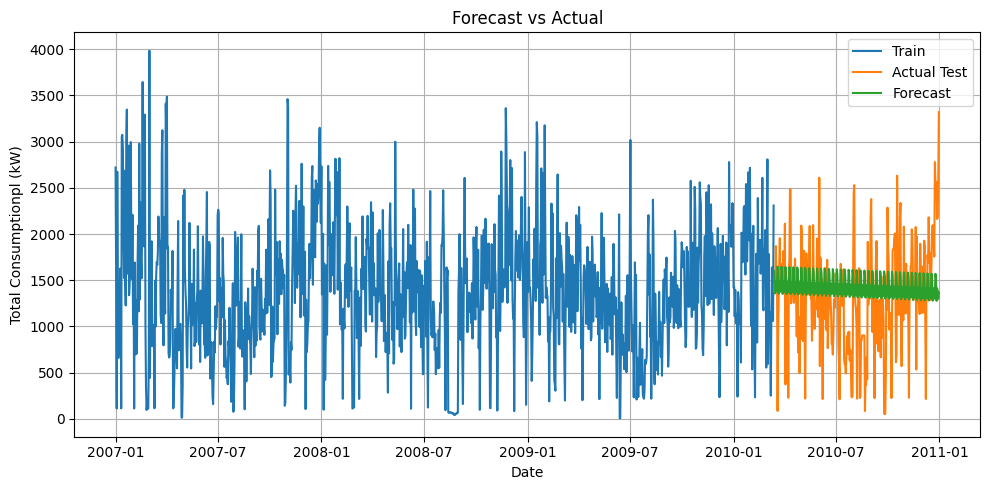

In [ ]:
#Plot Result
plt.figure(figsize=(10, 5))
plt.plot(train.index, train_E, label='Train')
plt.plot(test.index, test_E, label='Actual Test')
plt.plot(test.index, y_predE, label='Forecast')
plt.title("Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Total Consumptionpl (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Calculate RMSE

mae = mean_absolute_error(test_E, y_predE)
mse = mean_squared_error(test_E, y_predE)
rmse = np.sqrt(mse)
r2 = r2_score(test_E, y_predE)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 348639.6213
Root Mean Squared Error (RMSE): 590.4571
Mean Absolute Error (MAE): 449.7238
R² Score: -0.0904


### Auto Arima

In [ ]:
#Prepare Dataset

train_A = train
test_A = test

print(f'Training size: {len(train_A)}')
print(f'Testing size: {len(test_A)}')

Training size: 1168
Testing size: 293


In [ ]:
#Fit Data
model = ARIMA(train, order=(3, 1, 3))
model_fit = model.fit()

In [ ]:
#Test
print(f"Model fitted. Ready to forecast {len(test)} future values.")

Model fitted. Ready to forecast 293 future values.


In [ ]:
#Forecast
forecast = model_fit.forecast(steps=len(test))
forecast_series = pd.Series(forecast, index=test.index)

In [ ]:
# Convert DataFrames to NumPy arrays before reshaping
train_A = scaler.inverse_transform(train_A.values.reshape(-1, 1))
forecast_series = scaler.inverse_transform(forecast_series.values.reshape(-1, 1))
test_A = scaler.inverse_transform(test_A.values.reshape(-1, 1))

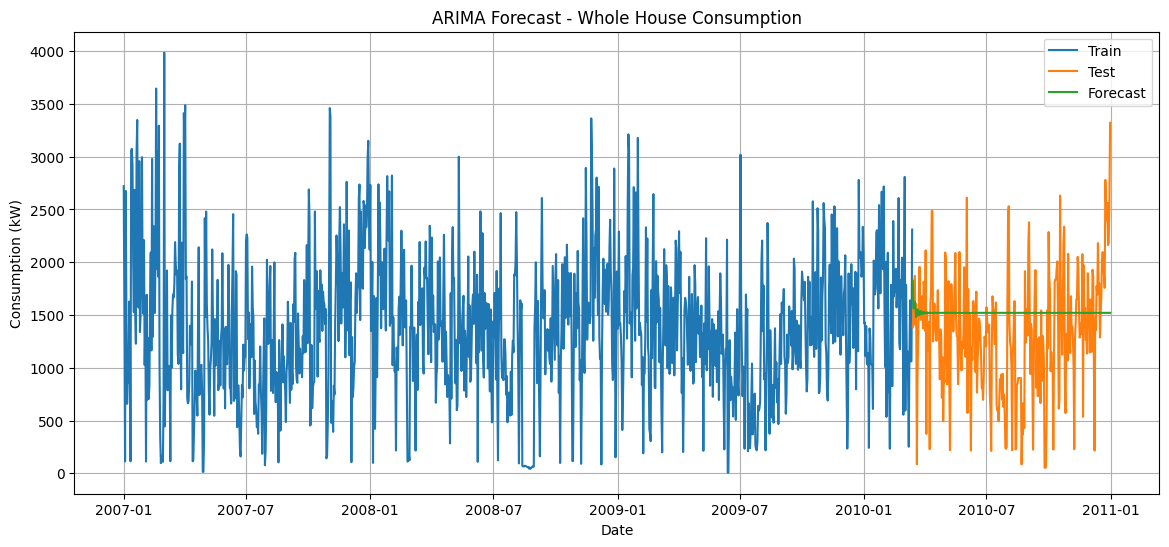

In [ ]:
#Plot Result
plt.figure(figsize=(14, 6))
plt.plot(train.index, train_A, label='Train')
plt.plot(test.index, test_A, label='Test')
plt.plot(test.index, forecast_series, label='Forecast')
plt.title('ARIMA Forecast - Whole House Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption (kW)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Calculate RMSE
mae = mean_absolute_error(test_A, forecast_series)
mse = mean_squared_error(test_A, forecast_series)
rmse = np.sqrt(mse)
r2 = r2_score(test_A, forecast_series)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 360880.8007
Root Mean Squared Error (RMSE): 600.7336
Mean Absolute Error (MAE): 467.1743
R² Score: -0.1287


### CNN1D

In [ ]:
#Prepare Dataset
# Function to convert time series into supervised dataset
def convert_dataset(data, look_back=30):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

look_back = 30

X, y = convert_dataset(subdf.values.flatten(), look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))  # [samples, timesteps, features]

# Split into training and testing (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # No activation since this is regression

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [ ]:
#Fit Data
history = model.fit(X_train, y_train, epochs=70, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0395 - mae: 0.1550 - val_loss: 0.0172 - val_mae: 0.0999
Epoch 2/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 - mae: 0.1187 - val_loss: 0.0173 - val_mae: 0.0997
Epoch 3/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mae: 0.1172 - val_loss: 0.0200 - val_mae: 0.1110
Epoch 4/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mae: 0.1133 - val_loss: 0.0160 - val_mae: 0.0969
Epoch 5/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mae: 0.1087 - val_loss: 0.0208 - val_mae: 0.1144
Epoch 6/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mae: 0.1145 - val_loss: 0.0157 - val_mae: 0.0947
Epoch 7/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mae: 0.1119 - val_loss: 0.0152 - val_mae: 0.0931
Epoch 8/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mae: 0.1064 - val_loss: 0.0151 - val_mae: 0.0930
Epoch 9/70
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mae: 

In [ ]:
#Test
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0241 - mae: 0.1170 
Test MAE: 0.1146


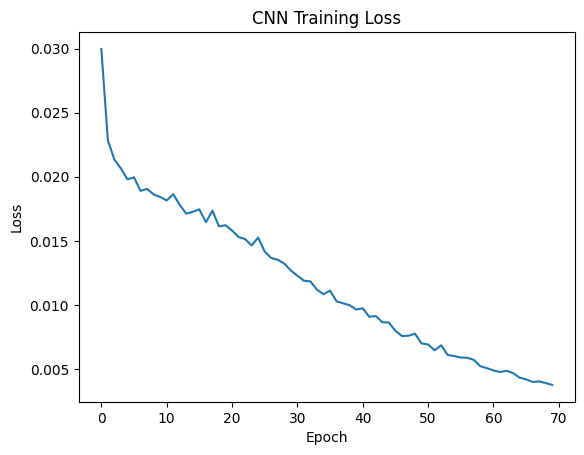

In [ ]:
#Plot training loss over epochs to asses model convergence
train_loss = history.history['loss']

plt.plot(train_loss)
plt.title('CNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Forecast
y_pred = model.predict(X_test)
# If needed, reshape predictions and actuals
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


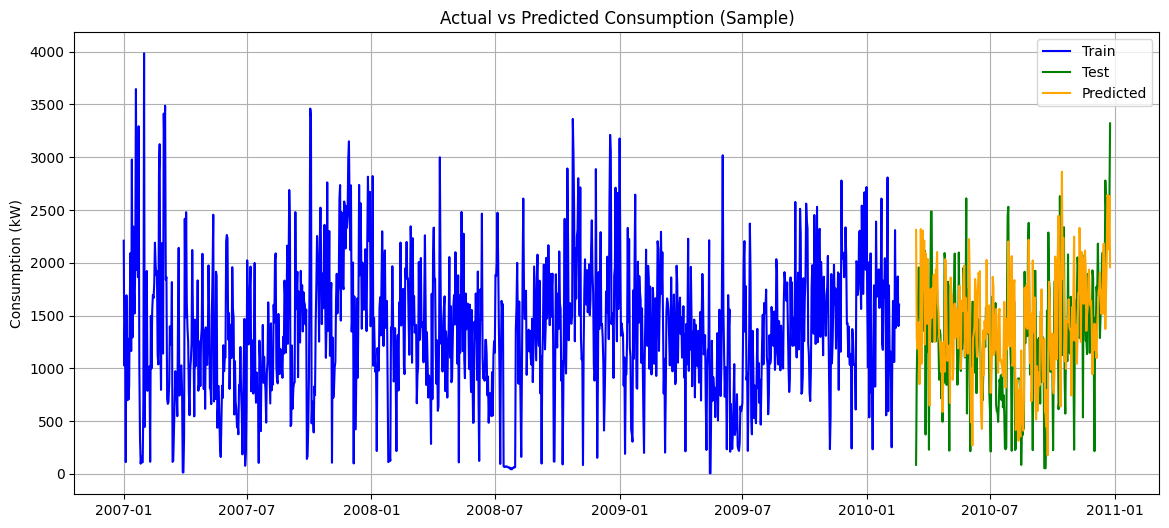

In [ ]:
#Plot Result
plt.figure(figsize=(14,6))
plt.plot(train.index[:X_train.shape[0]], y_train, label='Train', color="Blue")
plt.plot(test.index[:y_test.shape[0]], y_test, label='Test', color="Green")
plt.plot(test.index[:y_test.shape[0]], y_pred, label='Predicted', color="Orange")
plt.legend()
plt.title("Actual vs Predicted Consumption (Sample)")
plt.ylabel('Consumption (kW)')
plt.grid(True)
plt.show()

In [ ]:
#Calculate RMSE
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 368072.0943
Root Mean Squared Error (RMSE): 606.6895
Mean Absolute Error (MAE): 455.9142
R² Score: -0.1336


**Monthly Forecasting - CNN1D**

In [ ]:
# Reload original dataset and resample to monthly average consumption
original_df = pd.read_csv('Power_Consumption.csv')
original_df['Date'] = pd.to_datetime(original_df['Dates'])
original_df.set_index('Date', inplace=True)
monthly_data = original_df['Whole_House_Consumption'].resample('M').mean()

In [ ]:
# Weekly: use 'W' for weekly mean, or 'W-SUN' for Sunday-end weeks
scaler = MinMaxScaler()
scaled_monthly = scaler.fit_transform(monthly_data.values.reshape(-1, 1))

In [ ]:
#Scale monthly data and wrap in a DataFrame
scaled_monthly = scaler.fit_transform(monthly_data.values.reshape(-1, 1))
subdf_monthly = pd.DataFrame(scaled_monthly, index=monthly_data.index, columns=['Whole_House_Consumption'])

In [ ]:
look_back = 24
X, y = convert_dataset(scaled_monthly.flatten(), look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))  # [samples, timesteps, features]

# Split into training and testing (80/20 split)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build correct time index
y_full_index = monthly_data.index[look_back:]
y_train_index = y_full_index[:split]
y_test_index = y_full_index[split:]

In [ ]:
y_full_index = monthly_data.index[look_back:]

# Then split:
split = int(len(y_full_index) * 0.8)
y_train_index = y_full_index[:split]
y_test_index = y_full_index[split:]

In [ ]:
# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # No activation since this is regression

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [ ]:
#Fit Data
history = model.fit(X_train, y_train, epochs=70, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - loss: 0.4406 - mae: 0.6393 - val_loss: 0.1848 - val_mae: 0.3812
Epoch 2/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.1502 - mae: 0.3481 - val_loss: 0.0683 - val_mae: 0.1919
Epoch 3/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0514 - mae: 0.1969 - val_loss: 0.0493 - val_mae: 0.1666
Epoch 4/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0425 - mae: 0.1667 - val_loss: 0.0618 - val_mae: 0.2249
Epoch 5/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0529 - mae: 0.1726 - val_loss: 0.0657 - val_mae: 0.2363
Epoch 6/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0603 - mae: 0.1869 - val_loss: 0.0545 - val_mae: 0.2085
Epoch 7/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0507 - mae: 0.1678 - val_loss: 0.0451 - val_mae: 0.1685
Epoch 8/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0344 - mae: 0.1425 - val_loss: 0.0434 - val_mae: 0.1598
Epoch 9/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0263 - mae: 0.13

In [ ]:
#Test
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0158 - mae: 0.1033
Test MAE: 0.1033


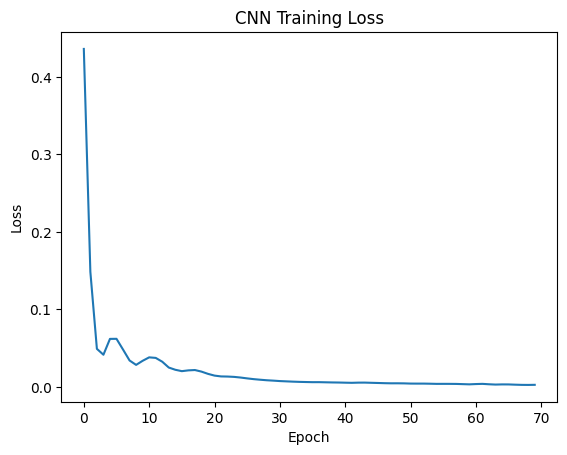

In [ ]:
#Plot training loss over epochs to asses model convergence
train_loss = history.history['loss']

plt.plot(train_loss)
plt.title('CNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#Forecast
y_pred = model.predict(X_test)


y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


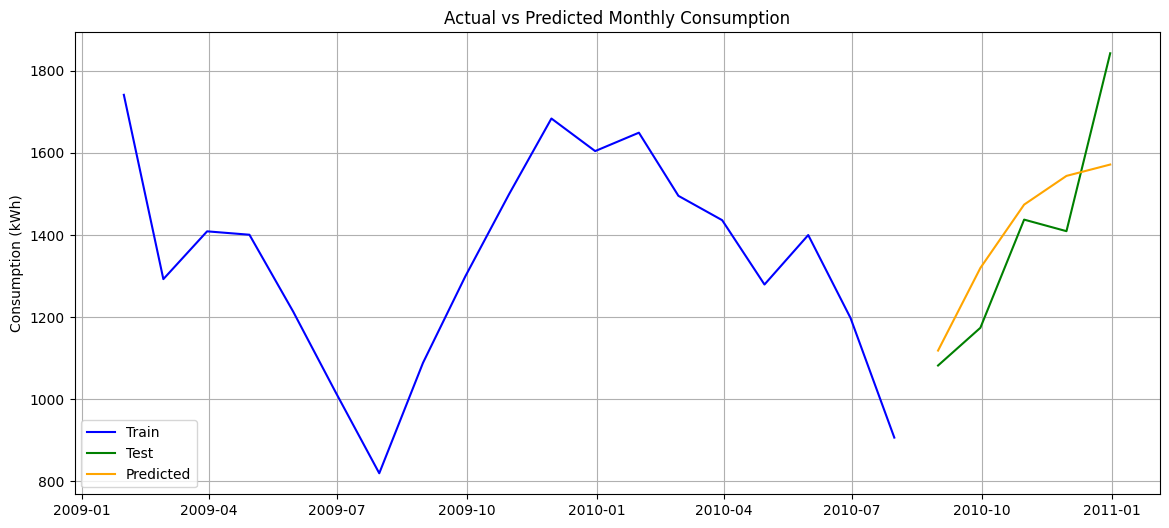

In [ ]:
#Plot actual vs. predicted consumption for training and test sets
plt.figure(figsize=(14,6))
plt.plot(y_train_index, y_train_inv, label='Train', color="Blue")
plt.plot(y_test_index, y_test_inv, label='Test', color="Green")
plt.plot(y_test_index, y_pred_inv, label='Predicted', color="Orange")
plt.legend()
plt.title("Actual vs Predicted Monthly Consumption")
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.show()

In [ ]:
#Calculate RMSE
# Evaluate the model
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 23114.8296
Root Mean Squared Error (RMSE): 152.0356
Mean Absolute Error (MAE): 124.9221
R² Score: 0.6691


**Final Results**



With the results in hand, we can take a look at which model performs the best with our current data structure. From a quick glance, The CNN1D Model beats out the other two in terms of MSE, coming in at 567.9 kW. However, the difference is only about 5.7 percent, which we don't believe is enough to call the CNN model out right better based on that state alone.

Next, we examined the forecast plots. Exponential Smoothing shows some effort to follow the peaks and valleys in the data, though it tends to smooth over finer patterns. ARIMA, in contrast, produces a relatively flat forecast, failing to adapt to fluctuations. CNN-1D, while not perfect, appears to capture the most variation and adapts more dynamically to the consumption pattern. This visual alignment reinforces its stronger performance.

However, we also reviewed the R² scores, which were concerning across all models. Each model yielded negative R² values, indicating that they explain less variance than simply predicting the mean. This significantly detracts from our confidence in their predictive power, especially when forecasting into the future.

We are also only looking a broad stroke of a complicated situation. THe power used by this home is split into several different rooms/variables. By looking at solely the Whole house consumption, we may be missing bits of the story or trends that the other rooms display that would help paint a better picture. While not every variable may be relevant, with none of them, our model is missing out on indicators that may produce a better forecast.

One other thought to consider when implementing this models is our Time Window. Their performance may suffer due to the sproadic tendencies that consumptions can display. My broadening our time window to weeks or months, it does increase the accuracy on those time frames. There is something lost in that process though in that there may be trends or understanding to find in the daily window. The Balance here would be based on our needs, and our read is that a weekly window might fit our expecations.

Based on this round of modeling, the CNN-1D model is the most promising candidate. However, the modest performance difference, along with poor R² scores, suggests that none of the models are currently capturing the true variability of energy consumption. Moving forward, we would recommend:

*   Tuning the CNN architecture to further reduce error,
*   Adding more input features (e.g., room-level consumption),
*   Possibly expanding the dataset to include additional households or contextual variables (e.g., temperature, day of week).

These steps would likely lead to stronger, more reliable forecasting models.